In [1]:
#%pip install scipy==1.11.4

In [16]:
import pandas as pd
import os
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt


from sklearn.metrics import f1_score,accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

# Data and model imports

In [3]:
path = os.getcwd() + '/data'
X_test = pd.read_csv(path + '/X_test.csv')
y_test = pd.read_csv(path + '/y_test.csv')
X_train = pd.read_csv(path + '/X_train.csv')
y_train = pd.read_csv(path + '/y_train.csv')

In [4]:
with open('models/under_lr.pkl', 'rb') as f:
    u_lr = pickle.load(f)
f.close()

with open('models/over_lr.pkl', 'rb') as f:
    o_lr = pickle.load(f)
f.close()

# Evaluation

## Logistic Regression

In [5]:
under_y_pred = u_lr.predict(X_test)
over_y_pred = o_lr.predict(X_test)

under_y_pred_proba = u_lr.predict_proba(X_test)
over_y_pred_proba =o_lr.predict_proba(X_test)

under_train_pred = u_lr.predict(X_train)
over_train_pred = o_lr.predict(X_train)

/Users/jakubkozlowski/anaconda3/envs/data_mining/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/jakubkozlowski/anaconda3/envs/data_mining/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/jakubkozlowski/anaconda3/envs/data_mining/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [6]:
print(f'Oversampling. Train: {accuracy_score(y_train, over_train_pred)} Test: {accuracy_score(y_test, over_y_pred)}')
print(f'Undersampling. Train: {accuracy_score(y_train, over_train_pred)} Test: {accuracy_score(y_test, under_y_pred)}')

Oversampling. Train: 0.8989944920125603 Test: 0.8962594371997255
Undersampling. Train: 0.8989944920125603 Test: 0.89159231297186


In [7]:
print(f"Oversampling f1_score: {f1_score(y_test, over_y_pred)}")
print(f"Undersampling f1_score: {f1_score(y_test, under_y_pred)}")

Oversampling f1_score: 0.4396663577386469
Undersampling f1_score: 0.4286489419424851


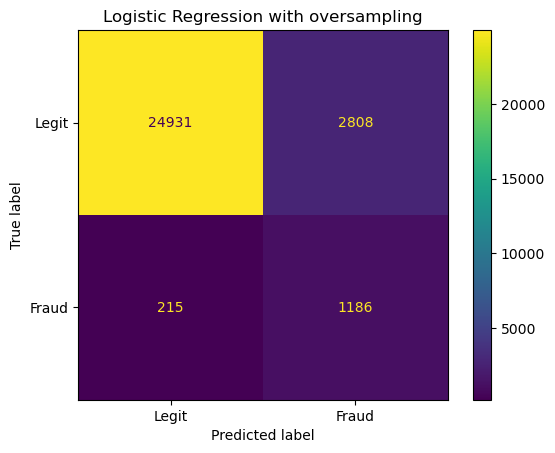

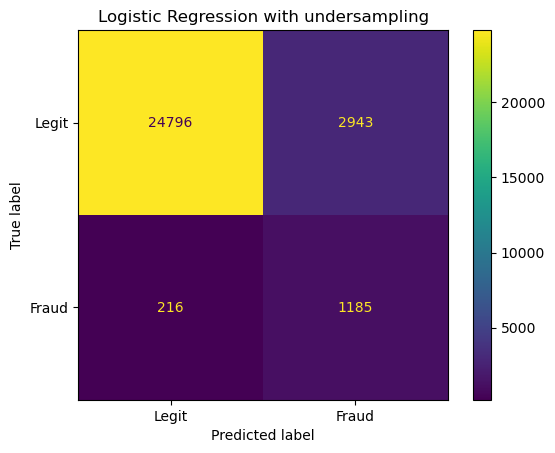

In [8]:
cm_over = confusion_matrix(y_test, over_y_pred)
cm_under = confusion_matrix(y_test, under_y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_over, display_labels = ['Legit', 'Fraud'])
cm_display.plot()
plt.title('Logistic Regression with oversampling')
plt.show()


cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_under, display_labels = ['Legit', 'Fraud'])
cm_display.plot()
plt.title('Logistic Regression with undersampling')
plt.show()

class 0 - legit
class 1 - fraud

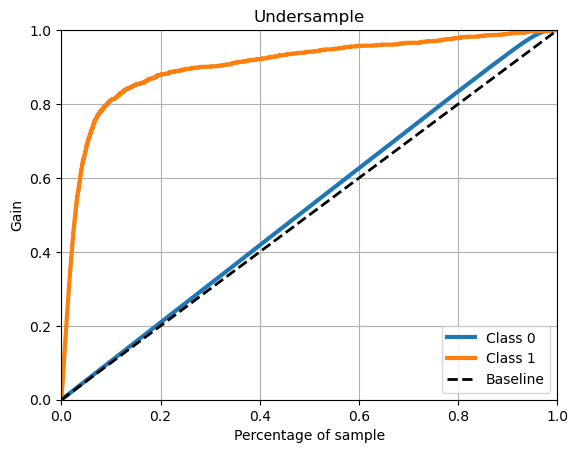

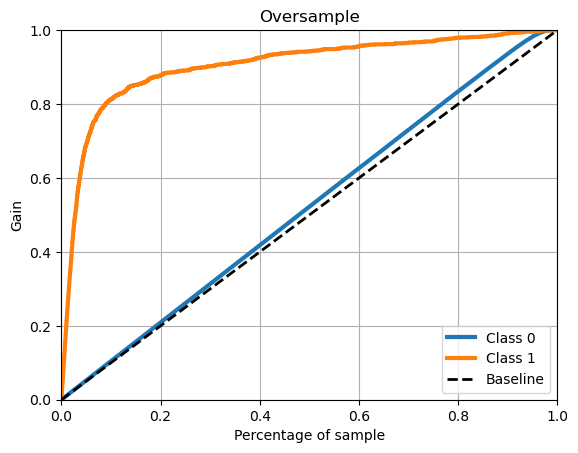

In [14]:
skplt.metrics.plot_cumulative_gain(y_test, under_y_pred_proba)
plt.title('Undersample')
plt.show()
skplt.metrics.plot_cumulative_gain(y_test, over_y_pred_proba)
plt.title('Oversample')
plt.show()

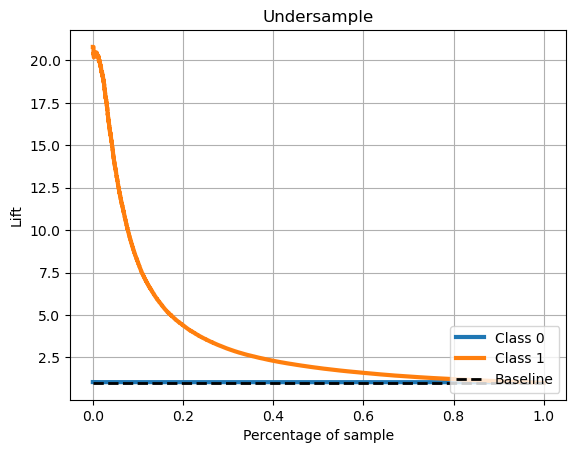

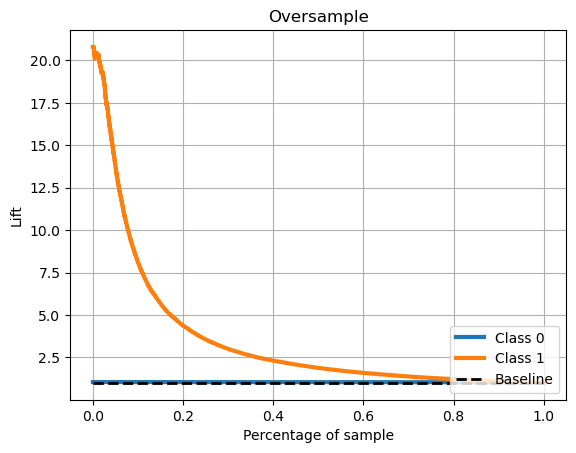

In [13]:
skplt.metrics.plot_lift_curve(y_test, under_y_pred_proba)
plt.title('Undersample')
plt.show()
skplt.metrics.plot_lift_curve(y_test, over_y_pred_proba)
plt.title('Oversample')
plt.show()

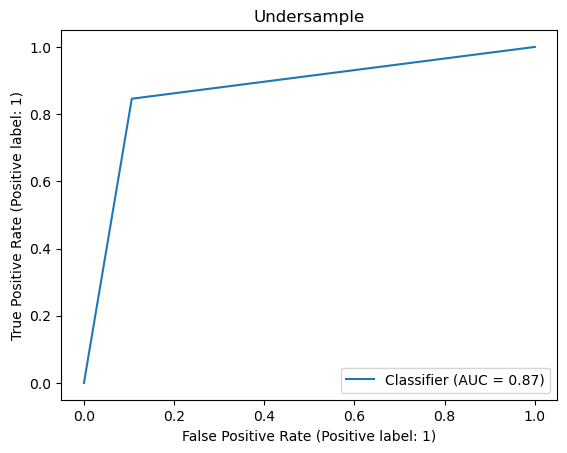

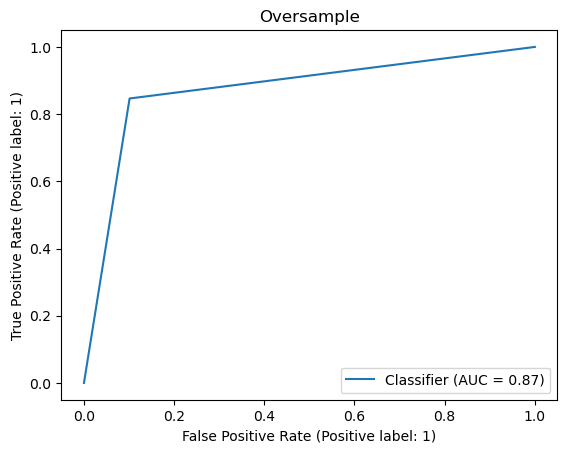

In [20]:
RocCurveDisplay.from_predictions(
    y_test, under_y_pred)
plt.title('Undersample')
plt.show()

RocCurveDisplay.from_predictions(
    y_test, over_y_pred)
plt.title('Oversample')
plt.show()